In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [11]:
data=pd.read_csv('../huigui/longley.csv')
print(data)
data=data.values
print(data)
x_data=data[:,2:]
y_data=data[:,1]
print(x_data)
print(y_data)

    Unnamed: 0  GNP.deflator      GNP  Unemployed  Armed.Forces  Population  \
0         1947          83.0  234.289       235.6         159.0     107.608   
1         1948          88.5  259.426       232.5         145.6     108.632   
2         1949          88.2  258.054       368.2         161.6     109.773   
3         1950          89.5  284.599       335.1         165.0     110.929   
4         1951          96.2  328.975       209.9         309.9     112.075   
5         1952          98.1  346.999       193.2         359.4     113.270   
6         1953          99.0  365.385       187.0         354.7     115.094   
7         1954         100.0  363.112       357.8         335.0     116.219   
8         1955         101.2  397.469       290.4         304.8     117.388   
9         1956         104.6  419.180       282.2         285.7     118.734   
10        1957         108.4  442.769       293.6         279.8     120.445   
11        1958         110.8  444.546       468.1   

In [13]:
#创建模型
#生成50个值
alphas_to_test=np.linspace(0.001,1)#代表岭系数
#创建模型保存误差值
model=RidgeCV(alphas=alphas_to_test,store_cv_values=True)
model.fit(x_data,y_data)
print(model.alpha_)#岭系数,最好的
print(model.cv_values_.shape)#16代表样本，每次取1个作为测试集，剩下作为训练集，50个岭系数，保存很多loss值

0.40875510204081633
(16, 50)


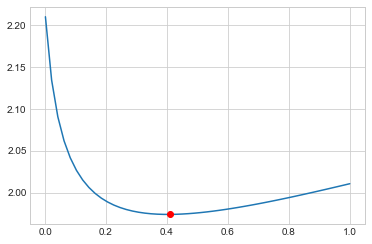

In [14]:
#画图
#岭系数与loss值关系
plt.plot(alphas_to_test,model.cv_values_.mean(axis=0))
#选取的岭系数的位置
plt.plot(model.alpha_,min(model.cv_values_.mean(axis=0)),'ro')

In [15]:
model.predict(x_data[2,np.newaxis])

array([88.11216213])